## What is pandas?
pandas is an open source Python library for data analysis

## Data Structures
pandas introduces two new data structures to Python - Series and DataFrame, both of which are built on top of Numpy

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Series

A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [121]:
# create a Series with an arbitrary list
s = pd.Series([1, None, 'Hello!', 3.1415, 15/2])
s

0         1
1      None
2    Hello!
3    3.1415
4       7.5
dtype: object

Alternatively, you can specify an index to use when creating the Series.

In [122]:
s = pd.Series([1, None, 'Hello!', 3.1415, 15/2],
              index=['A', 'Z', 'C', 'Y', 'E'])
s

A         1
Z      None
C    Hello!
Y    3.1415
E       7.5
dtype: object

The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [123]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

You can use the index to select specific items from the Series

In [124]:
cities['Chicago']

1000.0

In [125]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

Or you can use boolean indexing for selection.

In [126]:
cities[cities < 1000]

Austin      450.0
Portland    900.0
dtype: float64

That last one might be a little weird, so let's make it more clear - `cities < 1000` returns a Series of True/False values, which we then pass to our Series `cities`, returning the corresponding True items.

In [127]:
less_than_1000 = cities < 1000
print(less_than_1000)
print('\n')
print(cities[less_than_1000])

Austin            True
Boston           False
Chicago          False
New York         False
Portland          True
San Francisco    False
dtype: bool


Austin      450.0
Portland    900.0
dtype: float64


You can also change the values in a Series on the fly.

In [128]:
# changing based on the index
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])

Old value: 1000.0
New value: 1400.0


In [129]:
# changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

print(cities[cities < 1000])

Austin      450.0
Portland    900.0
dtype: float64


Austin      750.0
Portland    750.0
dtype: float64


What if you aren't sure whether an item is in the Series?  You can check using idiomatic Python.

In [130]:
print('Seattle' in cities)
print('San Francisco' in cities)

False
True


Mathematical operations can be done using scalars and functions.

In [131]:
# divide city values by 3
cities / 3

Austin           250.000000
Boston                  NaN
Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
dtype: float64

In [132]:
# square city values
np.square(cities)

Austin            562500.0
Boston                 NaN
Chicago          1960000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
dtype: float64

You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values.  Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).

In [133]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


Notice that because Austin, Chicago, and Portland were not found in both Series, they were returned with NULL/NaN values.

NULL checking can be performed with `isnull` and `notnull`.

In [134]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

Austin            True
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool

In [135]:
# use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool


Boston   NaN
dtype: float64


## DataFrame

A DataFrame is a tablular data structure comprised of rows and columns. Also, DataFrame is a group of Series objects that share an index.

### Reading Data

To create a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.

Using the `columns` parameter allows us to tell the constructor how we'd like the columns ordered. By default, the DataFrame constructor will order the columns alphabetically

In [136]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


**CSV**

In [137]:
from_csv = pd.read_csv('./data/mariano-rivera.csv')
from_csv.head()

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB,Awards
0,1995,25,NYY,AL,5,3,0.625,5.51,19,10,...,0,301,84,1.507,9.5,1.5,4.0,6.9,1.70,NaN
1,1996,26,NYY,AL,8,3,0.727,2.09,61,0,...,1,425,240,0.994,6.1,0.1,2.8,10.9,3.82,CYA-3MVP-12
2,1997,27,NYY,AL,6,4,0.600,1.88,66,0,...,2,301,239,1.186,8.2,0.6,2.5,8.5,3.40,ASMVP-25
3,1998,28,NYY,AL,3,0,1.000,1.91,54,0,...,0,246,233,1.060,7.0,0.4,2.5,5.3,2.12,NaN
4,1999,29,NYY,AL,4,3,0.571,1.83,66,0,...,2,268,257,0.884,5.6,0.3,2.3,6.8,2.89,ASCYA-3MVP-14


In [138]:
with_headers = pd.read_csv('./data/peyton-passing-TDs-2012.csv', sep=',')
with_headers.head()

,1,1.1,2012-09-09,DEN,Unnamed: 4,PIT,W 31-19,3,71,Demaryius Thomas,Trail 7-13,Lead 14-13*
0,2,1,2012-09-09,DEN,NaN,PIT,W 31-19,4,1,Jacob Tamme,Trail 14-19,Lead 22-19*
1,3,2,2012-09-17,DEN,@,ATL,L 21-27,2,17,Demaryius Thomas,Trail 0-20,Trail 7-20
2,4,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,38,Brandon Stokley,Trail 11-31,Trail 18-31
3,5,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,6,Joel Dreessen,Trail 18-31,Trail 25-31
4,6,4,2012-09-30,DEN,NaN,OAK,W 37-6,1,22,Joel Dreessen,Tied 0-0,Lead 7-0*


In [139]:
cols = ['num', 'game', 'date', 'team', 'home_away', 'opponent',
        'result', 'quarter', 'distance', 'receiver', 'score_before',
        'score_after']
no_headers = pd.read_csv('./data/peyton-passing-TDs-2012.csv', sep=',', header=None, names=cols)
no_headers.head()

,num,game,date,team,home_away,opponent,result,quarter,distance,receiver,score_before,score_after
0,1,1,2012-09-09,DEN,NaN,PIT,W 31-19,3,71,Demaryius Thomas,Trail 7-13,Lead 14-13*
1,2,1,2012-09-09,DEN,NaN,PIT,W 31-19,4,1,Jacob Tamme,Trail 14-19,Lead 22-19*
2,3,2,2012-09-17,DEN,@,ATL,L 21-27,2,17,Demaryius Thomas,Trail 0-20,Trail 7-20
3,4,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,38,Brandon Stokley,Trail 11-31,Trail 18-31
4,5,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,6,Joel Dreessen,Trail 18-31,Trail 25-31


## Working with DataFrames

The dataset 'movielens' contains 100,000 ratings made by 943 users on 1,682 movies.

In [140]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./data/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./data/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('./data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

### Inspection

pandas has a variety of functions for getting basic information about your DataFrame, the most basic of which is using the `info` method.

In [141]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


In [142]:
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

DataFrame's also have a `describe` method, which is great for seeing basic statistics about the dataset's numeric columns

In [143]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [144]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [145]:
movies.tail(3)

,movie_id,title,release_date,video_release_date,imdb_url
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...
1681,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%...


Alternatively, Python's regular [slicing](http://docs.python.org/release/2.3.5/whatsnew/section-slices.html) syntax works as well.

In [146]:
movies[20:22]

,movie_id,title,release_date,video_release_date,imdb_url
20,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...
21,22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...


### Selecting

Selecting a single column from the DataFrame will return a Series object.

In [147]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

To select multiple columns, simply pass a list of column names to the DataFrame, the output of which will be a DataFrame.

In [148]:
print(users[['age', 'zip_code']].head())
print('\n')

# can also store in a variable to use later
columns_you_want = ['occupation', 'sex'] 
print(users[columns_you_want].head())

   age zip_code
0   24    85711
1   53    94043
2   23    32067
3   24    43537
4   33    15213


   occupation sex
0  technician   M
1       other   F
2      writer   M
3  technician   M
4       other   F


Row selection can be done multiple ways, but doing so by an individual index or boolean indexing are typically easiest.

In [149]:
# users older than 25
print(users[users.age > 25].head(3))
print('\n')

# users aged 40 AND male
print(users[(users.age == 40) & (users.sex == 'M')].head(3))
print('\n')

# users younger than 30 OR female
print(users[(users.sex == 'F') | (users.age < 30)].head(3))

   user_id  age sex occupation zip_code
1        2   53   F      other    94043
4        5   33   F      other    15213
5        6   42   M  executive    98101


     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232


   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067


Since our index is kind of meaningless right now, let's set it to the _user_id_ using the `set_index` method. 
It's not an inplace operation!!!

In [150]:
print(users.set_index('user_id').head())
print('\n')

print(users.head())
print("\n^^^ I didn't actually change the DataFrame. ^^^\n")

with_new_index = users.set_index('user_id')
print(with_new_index.head())
print("\n^^^ set_index returns a new DataFrame. ^^^\n")

         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213


   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213

^^^ I didn't actually change the DataFrame. ^^^

         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213

^^^ set_index returns a new DataFrame. ^^^



In [151]:
users.set_index('user_id', inplace=True)
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


We can select rows *by position* using the `iloc` method.

In [152]:
print(users.iloc[99])
print('\n')
print(users.iloc[[1, 50, 300]])

age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 100, dtype: object


         age sex occupation zip_code
user_id                             
2         53   F      other    94043
51        28   M   educator    16509
301       24   M    student    55439


And we can select rows *by label* with the `loc` method.

In [153]:
print(users.loc[100])
print('\n')
print(users.loc[[2, 51, 301]])

age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 100, dtype: object


         age sex occupation zip_code
user_id                             
2         53   F      other    94043
51        28   M   educator    16509
301       24   M    student    55439


If we realize later that we liked the old pandas default index, we can just `reset_index`.  The same rules for `inplace` apply.

In [154]:
users.reset_index(inplace=True)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


The simplified rules of indexing are

- Use `loc` for label-based indexing
- Use `iloc` for positional indexing

### Joining

> how : {'left', 'right', 'outer', 'inner'}, default 'inner'

>    * left: use only keys from left frame (SQL: left outer join)

>    * right: use only keys from right frame (SQL: right outer join)

>    * outer: use union of keys from both frames (SQL: full outer join)

>    * inner: use intersection of keys from both frames (SQL: inner join)


In [155]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print('\n')
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


**inner join (default)**

In [156]:
pd.merge(left_frame, right_frame, on='key', how='inner')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


**left outer join**

In [157]:
pd.merge(left_frame, right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


**right outer join**

In [158]:
pd.merge(left_frame, right_frame, on='key', how='right')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


**full outer join**

In [159]:
pd.merge(left_frame, right_frame, on='key', how='outer')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


### Combining

pandas also provides a way to combine DataFrames along an axis - `pandas.concat`

`pandas.concat` takes a list of Series or DataFrames and returns a Series or DataFrame of the concatenated objects

In [160]:
pd.concat([left_frame, right_frame])

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


Additionally, objects can be concatentated side-by-side using the function's *axis* parameter.

In [161]:
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


### Grouping
![Source: Gratuitously borrowed from [Hadley Wickham's Data Science in R slides](http://courses.had.co.nz/12-oscon/)](http://i.imgur.com/yjNkiwL.png)


>converters : dict. optional

>* Dict of functions for converting values in certain columns. Keys can either be integers or column labels

In [162]:
headers = ['name', 'title', 'department', 'salary']
chicago = pd.read_csv('./data/city-of-chicago-salaries.csv', 
                      header=0,
                      names=headers,
                      converters={'salary': lambda x: float(x.replace('$', ''))})
chicago.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440.0


pandas `groupby` returns a DataFrameGroupBy object which has a variety of methods, many of which are similar to standard SQL aggregate functions.

In [163]:
by_dept = chicago.groupby('department')
by_dept

Calling `count` returns the total number of NOT NULL values within each column. If we were interested in the total number of records in each group, we could use `size`.

In [164]:
print(by_dept.count().head()) # NOT NULL records within each column
print('\n')
print(by_dept.size().tail()) # total records for each department

                   name  title  salary
department                            
ADMIN HEARNG         42     42      42
ANIMAL CONTRL        61     61      61
AVIATION           1218   1218    1218
BOARD OF ELECTION   110    110     110
BOARD OF ETHICS       9      9       9


department
PUBLIC LIBRARY     926
STREETS & SAN     2070
TRANSPORTN        1168
TREASURER           25
WATER MGMNT       1857
dtype: int64


Summation can be done via `sum`, averaging by `mean`, etc.

In [165]:
print(by_dept.sum()[20:25]) # total salaries of each department
print('\n')
print(by_dept.mean()[20:25]) # average salary of each department
print('\n')
print(by_dept.median()[20:25]) # take that, RDBMS!

                       salary
department                   
HUMAN RESOURCES     4850928.0
INSPECTOR GEN       4035150.0
IPRA                7006128.0
LAW                31883920.2
LICENSE APPL COMM     65436.0


                         salary
department                     
HUMAN RESOURCES    71337.176471
INSPECTOR GEN      80703.000000
IPRA               82425.035294
LAW                70853.156000
LICENSE APPL COMM  65436.000000


                    salary
department                
HUMAN RESOURCES    68496.0
INSPECTOR GEN      76116.0
IPRA               82524.0
LAW                66492.0
LICENSE APPL COMM  65436.0


### split-apply-combine

The real power of `groupby` comes from it's split-apply-combine ability.

What if we wanted to see the highest paid employee within each department. Given our current dataset, we'd have to do something like this in SQL:

    SELECT *
    FROM chicago c
    INNER JOIN (
        SELECT department, max(salary) max_salary
        FROM chicago
        GROUP BY department
    ) m
    ON c.department = m.department
    AND c.salary = m.max_salary;
    
This would give you the highest paid person in each department, but it would return multiple if there were many equally high paid people within a department.

Alternatively, you could alter the table, add a column, and then write an update statement to populate that column. However, that's not always an option.

_Note: This would be a lot easier in PostgreSQL, T-SQL, and possibly Oracle due to the existence of partition/window/analytic functions. I've chosen to use MySQL syntax throughout this tutorial because of it's popularity. Unfortunately, MySQL doesn't have similar functions._

Using `groupby` we can define a function (which we'll call `ranker`) that will label each record from 1 to N, where N is the number of employees within the department. We can then call `apply` to, well, _apply_ that function to each group (in this case, each department).

In [166]:
def ranker(df):
    """Assigns a rank to each employee based on salary, with 1 being the highest paid.
    Assumes the data is DESC sorted."""
    df['dept_rank'] = np.arange(len(df)) + 1
    return df

In [167]:
chicago.sort_values('salary', ascending=False, inplace=True)
chicago = chicago.groupby('department').apply(ranker)
chicago[chicago.dept_rank == 1].head(7)

,name,title,department,salary,dept_rank
18039,"MC CARTHY, GARRY F",SUPERINTENDENT OF POLICE,POLICE,260004.0,1
8004,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,216210.0,1
25588,"SANTIAGO, JOSE A",FIRE COMMISSIONER,FIRE,202728.0,1
763,"ANDOLINO, ROSEMARIE S",COMMISSIONER OF AVIATION,AVIATION,186576.0,1
4697,"CHOUCAIR, BECHARA N",COMMISSIONER OF HEALTH,HEALTH,177156.0,1
21971,"PATTON, STEPHEN R",CORPORATION COUNSEL,LAW,173664.0,1
12635,"HOLT, ALEXANDRA D",BUDGET DIR,BUDGET & MGMT,169992.0,1


In [168]:
chicago[chicago.department == "LAW"][:5]

,name,title,department,salary,dept_rank
21971,"PATTON, STEPHEN R",CORPORATION COUNSEL,LAW,173664.0,1
6311,"DARLING, LESLIE M",FIRST ASST CORPORATION COUNSEL,LAW,149160.0,2
17680,"MARTINICO, JOSEPH P",CHIEF LABOR NEGOTIATOR,LAW,144036.0,3
22357,"PETERS, LYNDA A",CITY PROSECUTOR,LAW,139932.0,4
31383,"WONG JR, EDWARD J",DEPUTY CORPORATION COUNSEL,LAW,137076.0,5


We can now see where each employee ranks within their department based on salary.

## Using pandas on the MovieLens dataset

In [169]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./data/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./data/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('./data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


**What are the 25 most rated movies?**

In [170]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [171]:
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

**Which movies are most highly rated?**

In [172]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

We can use the `agg` method to pass a dictionary specifying the columns to aggregate (as keys) and a list of functions we'd like to apply.

Let's sort the resulting DataFrame so that we can see which movies have the highest average score.

In [173]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

The above movies are rated so rarely that we can't count them as quality films. Let's only look at movies that have been rated at least 100 times.

In [174]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

**Limiting our population going forward**

Going forward, let's only look at the 50 most rated movies. Let's make a Series of movies that meet this threshold so we can use it for filtering later.

In [175]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

**Which movies are most controversial amongst different ages?**

Let's look at how these movies are viewed across different age groups. First, let's look at how age is distributed amongst our users.

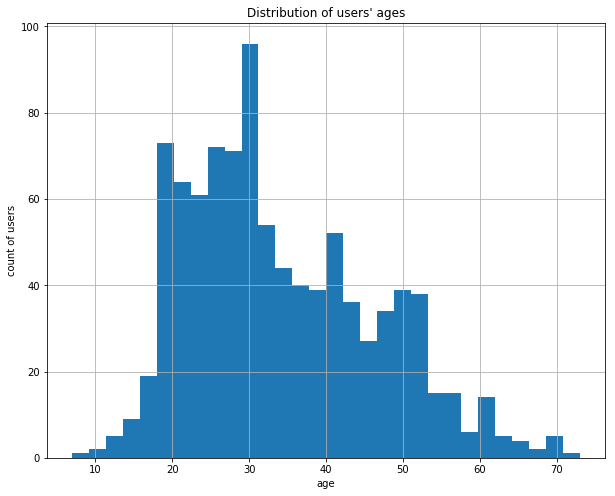

In [176]:
plt.figure(figsize=(10,8))
users.age.plot.hist(bins=30)
plt.grid(True)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

**Binning our users**

Let's bin our users into age groups using `pandas.cut`.

In [177]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


Now we can now compare ratings across age groups.

In [178]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [179]:
lens.set_index('movie_id', inplace=True)
lens.head()

,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
movie_id,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [180]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

In [181]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000
